In [2]:
import pandas as pd
data = pd.read_csv("OUA 23-24.csv")
data 

,Team,Opponent,Result,Game Score,3PTM,3PTA,3Pt%,FGM,FGA,FG%,...,FT%,OREB,DREB,REB,PF,A,TO,Blk,Stl,Pts
0,Carleton,Guelph,Win,83-66,10.0,22.0,45.5,31.0,79.0,39.2,...,78.6,19.0,23.0,42.0,10.0,14.0,18.0,1.0,15.0,83.0
1,Carleton,Western,Win,72-46,2.0,12.0,16.7,29.0,64.0,45.3,...,52.2,12.0,36.0,48.0,20.0,12.0,12.0,3.0,2.0,72.0
2,Carleton,Windsor,Win,57-52,3.0,16.0,18.8,22.0,61.0,36.1,...,66.7,22.0,33.0,55.0,18.0,3.0,26.0,4.0,3.0,59.0
3,Carleton,Brock,Win,81-79,4.0,24.0,16.7,28.0,66.0,42.4,...,65.6,13.0,26.0,39.0,14.0,13.0,19.0,0.0,9.0,81.0
4,Carleton,Lakehead,Win,85-41,3.0,8.0,37.5,36.0,71.0,50.7,...,90.9,11.0,31.0,42.0,16.0,8.0,11.0,5.0,9.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,York,Guelph,Win,66-65,8.0,21.0,38.1,22.0,61.0,36.1,...,82.4,11.0,20.0,31.0,15.0,7.0,17.0,1.0,9.0,66.0
417,York,Laurier,Loss,56-86,6.0,23.0,26.1,21.0,65.0,32.3,...,66.7,15.0,21.0,36.0,15.0,9.0,26.0,6.0,9.0,56.0
418,York,Toronto Metropolitan,Loss,66-74,6.0,20.0,30.0,26.0,70.0,37.1,...,57.1,18.0,28.0,46.0,19.0,15.0,18.0,2.0,8.0,66.0
419,York,Toronto Metropolitan,Loss,68-75,8.0,23.0,34.8,20.0,63.0,31.7,...,83.3,13.0,15.0,28.0,20.0,9.0,11.0,0.0,8.0,68.0


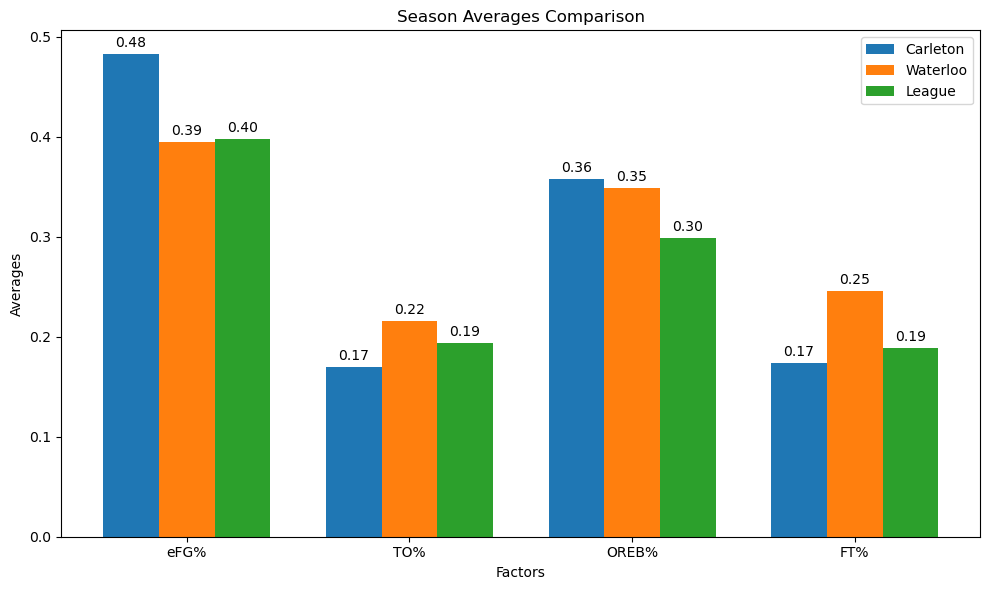

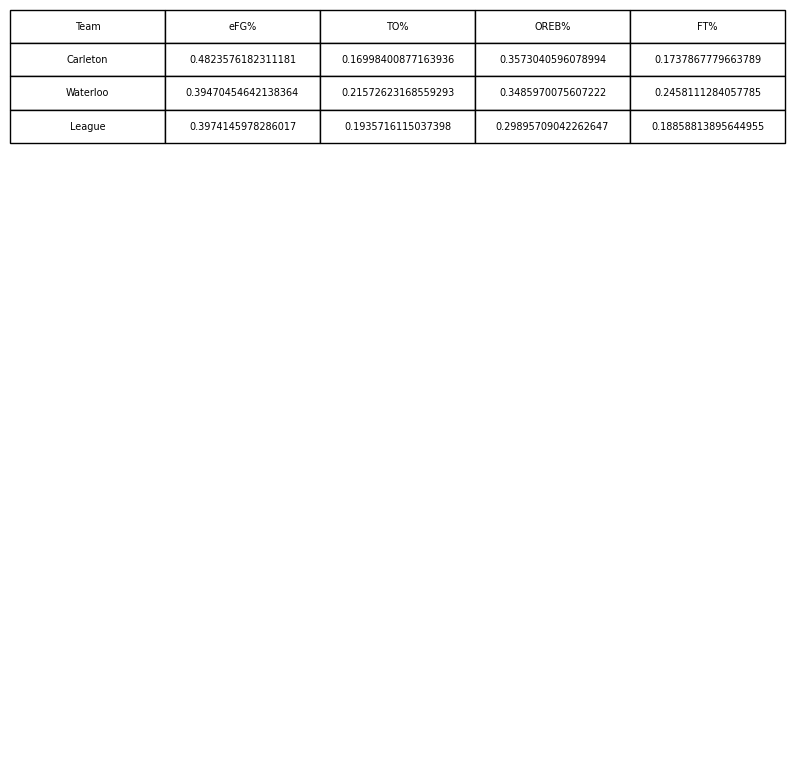

In [64]:
# Define a function to calculate eFG%, TO%, OREB%, and FT%
def calculate_four_factors(df):
    df['eFG%'] = (df['FGM'] + 0.5 * df['3PTM']) / df['FGA']
    df['TO%'] = df['TO'] / (df['FGA'] + 0.44 * df['FTA'] + df['TO'])
    df['OREB%'] = df['OREB'] / (df['OREB'] + df['DREB']) # Assuming DREB is the opponent's DREB
    df['FT%'] = df['FTM'] / df['FGA']
    return df

# Calculate the four factors for each game
data = calculate_four_factors(data)

# Separate Carleton's and Waterloo's games from the rest of the league
carleton_data = data[data['Team'] == 'Carleton']
waterloo_data = data[data['Team'] == 'Waterloo']
league_data = data[(data['Team'] != 'Carleton') & (data['Team'] != 'Waterloo')]

# Calculate the season averages for Carleton, Waterloo, and the league
carleton_averages = carleton_data[['eFG%', 'TO%', 'OREB%', 'FT%']].mean()
waterloo_averages = waterloo_data[['eFG%', 'TO%', 'OREB%', 'FT%']].mean()
league_averages = league_data[['eFG%', 'TO%', 'OREB%', 'FT%']].mean()


# Plotting the averages
labels = ['eFG%', 'TO%', 'OREB%', 'FT%']
carleton_values = carleton_averages.values
waterloo_values = waterloo_averages.values
league_values = league_averages.values

x = list(range(len(labels)))  # Convert range to list
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Carleton's averages
rects1 = ax.bar([pos - width for pos in x], carleton_values, width, label='Carleton')
# Plotting Waterloo's averages
rects2 = ax.bar(x, waterloo_values, width, label='Waterloo')
# Plotting League's averages
rects3 = ax.bar([pos + width for pos in x], league_values, width, label='League')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Factors')
ax.set_ylabel('Averages')
ax.set_title('Season Averages Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# Create the table
table_data = [
    ['Carleton', *carleton_averages],
    ['Waterloo', *waterloo_averages],
    ['League', *league_averages]
]

# Plotting the averages
labels = ['eFG%', 'TO%', 'OREB%', 'FT%']

fig, ax = plt.subplots(figsize=(10, 8))

# Create the table
table = plt.table(cellText=table_data, colLabels=['Team'] + labels, loc='top', cellLoc='center')
table.scale(1, 2)

# Hide axes
ax.axis('off')

plt.show()

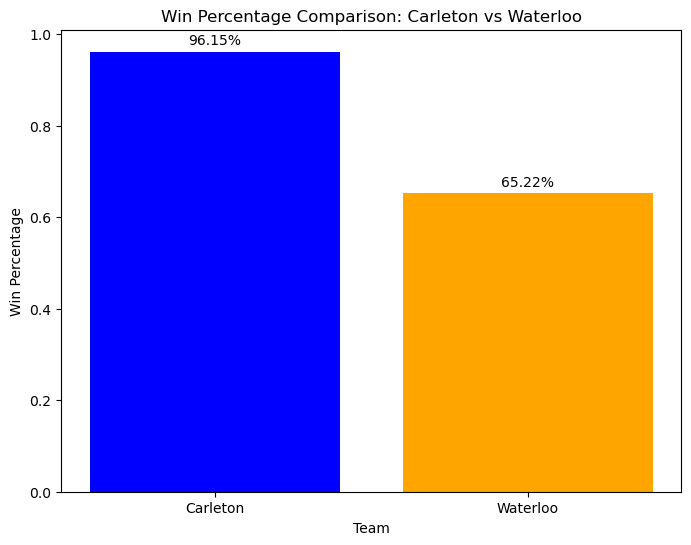

In [65]:
# Calculate the win percentage for Carleton
carleton_wins = data[(data['Team'] == 'Carleton') & (data['Result'] == 'Win')].shape[0]
carleton_total_games = data[data['Team'] == 'Carleton'].shape[0]
carleton_win_percentage = carleton_wins / carleton_total_games

# Calculate the win percentage for Waterloo
waterloo_wins = data[(data['Team'] == 'Waterloo') & (data['Result'] == 'Win')].shape[0]
waterloo_total_games = data[data['Team'] == 'Waterloo'].shape[0]
waterloo_win_percentage = waterloo_wins / waterloo_total_games

# Display win percentages
carleton_win_percentage, waterloo_win_percentage

# Plot win percentages
teams = ['Carleton', 'Waterloo']
win_percentages = [carleton_win_percentage, waterloo_win_percentage]

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(teams, win_percentages, color=['blue', 'orange'])

# Add labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Win Percentage')
ax.set_title('Win Percentage Comparison: Carleton vs Waterloo')

# Attach a text label above each bar in *bars*, displaying its height
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [49]:
from scipy.stats import ttest_ind

# Separate Carleton's data
carleton_data = data[data['Team'] == 'Carleton']
waterloo_data = data[data['Team'] == 'Waterloo']
league_data = data[data['Team'] != 'Carleton']

# Perform t-tests
factors = ['eFG%', 'TO%', 'OREB%', 'FT%']
t_test_results = []

for factor in factors:
    carleton_values = carleton_data[factor].dropna()
    waterloo_values = waterloo_data[factor].dropna()
    league_values = league_data[factor].dropna()

    carleton_vs_league_t_stat, carleton_vs_league_p_value = ttest_ind(carleton_values, league_values, equal_var=False)
    waterloo_vs_league_t_stat, waterloo_vs_league_p_value = ttest_ind(waterloo_values, league_values, equal_var=False)
    carleton_vs_waterloo_t_stat, carleton_vs_waterloo_p_value = ttest_ind(carleton_values, waterloo_values, equal_var=False)

    t_test_results.append({
        'Comparison': 'Carleton vs League',
        'Factor': factor,
        'T-Statistic': carleton_vs_league_t_stat,
        'P-Value': carleton_vs_league_p_value
    })

    t_test_results.append({
        'Comparison': 'Waterloo vs League',
        'Factor': factor,
        'T-Statistic': waterloo_vs_league_t_stat,
        'P-Value': waterloo_vs_league_p_value
    })

    t_test_results.append({
        'Comparison': 'Carleton vs Waterloo',
        'Factor': factor,
        'T-Statistic': carleton_vs_waterloo_t_stat,
        'P-Value': carleton_vs_waterloo_p_value
    })

t_test_results_df = pd.DataFrame(t_test_results)
t_test_results_df


,Comparison,Factor,T-Statistic,P-Value
0,Carleton vs League,eFG%,6.405361,3.484186e-07
1,Waterloo vs League,eFG%,-0.133709,8.947192e-01
2,Carleton vs Waterloo,eFG%,3.917167,3.467462e-04
3,Carleton vs League,TO%,-2.781401,8.828681e-03
4,Waterloo vs League,TO%,1.499611,1.463948e-01
5,Carleton vs Waterloo,TO%,-2.882549,6.523463e-03
6,Carleton vs League,OREB%,3.706152,8.534758e-04
7,Waterloo vs League,OREB%,2.528158,1.824494e-02
8,Carleton vs Waterloo,OREB%,0.379202,7.063873e-01
9,Carleton vs League,FT%,-1.273356,2.122175e-01


### Summary

**Carleton**:
- Excels in eFG%, TO%, and OREB% compared to the league.
- Has a significantly higher eFG% and lower TO% compared to Waterloo, indicating better shooting efficiency and ball handling.
- No significant difference in OREB% compared to Waterloo.
- FT% is lower than Waterloo but not different from the league average.

**Waterloo**:
- Similar eFG% and TO% to the league average.
- Higher OREB% and FT% compared to the league.
- FT% is higher compared to Carleton, indicating better free throw shooting.

**League**:
- Serves as a baseline for comparison.


In [56]:
# Drop rows with NaN values
data_clean = data.dropna(subset=['eFG%', 'TO%', 'OREB%', 'FT%', 'Result'])

# Prepare the data for regression
X = data_clean[['eFG%', 'TO%', 'OREB%', 'FT%']]
y = data_clean['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
coefficients = model.coef_

print(f"Model Accuracy: {accuracy}")
print(f"Model Coefficients: {coefficients}")


Model Accuracy: 0.7738095238095238
Model Coefficients: [[ 4.92648962 -2.97468063  1.11861158  1.43270878]]


In [62]:


# Import necessary libraries
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Assume 'model' is your trained logistic regression model
# Assume 'coefficients' are the coefficients of your logistic regression model
# Assume 'carleton_averages' contains the average stats for Carleton

# Define the function to calculate win probability based on given OREB%
def calculate_win_probability_with_oreb(oreb):
    eFG = carleton_averages['eFG%']
    TO = carleton_averages['TO%']
    FT = carleton_averages['FT%']
    log_odds = model.intercept_[0] + coefficients[0][0] * eFG + coefficients[0][1] * TO + coefficients[0][2] * oreb + coefficients[0][3] * FT
    win_prob = 1 / (1 + np.exp(-log_odds))
    return win_prob

# Create the slider widget
oreb_slider = widgets.FloatSlider(
    value=carleton_averages['OREB%'],
    min=0.0,
    max=1.0,
    step=0.01,
    description='OREB%',
    continuous_update=True
)

# Define the function to update the output based on slider value
def update_win_probability(change):
    win_prob = calculate_win_probability_with_oreb(change['new'])
    print(f'Win Probability with OREB%={change["new"]:.2f}: {win_prob:.4f}')

# Attach the update function to slider value change event
oreb_slider.observe(update_win_probability, names='value')

# Display the slider
display(oreb_slider)

# Initialize with the current value
update_win_probability({'new': carleton_averages['OREB%']})


FloatSlider(value=0.3573040596078994, description='OREB%', max=1.0, step=0.01)

Win Probability with OREB%=0.36: 0.6236
Win Probability with OREB%=0.36: 0.6243
Win Probability with OREB%=0.37: 0.6269
Win Probability with OREB%=0.38: 0.6296
Win Probability with OREB%=0.39: 0.6322
Win Probability with OREB%=0.40: 0.6348
Win Probability with OREB%=0.41: 0.6374
Win Probability with OREB%=0.42: 0.6399
Win Probability with OREB%=0.43: 0.6425
Win Probability with OREB%=0.45: 0.6476
Win Probability with OREB%=0.46: 0.6502
Win Probability with OREB%=0.47: 0.6527
Win Probability with OREB%=0.48: 0.6553
Win Probability with OREB%=0.49: 0.6578
Win Probability with OREB%=0.48: 0.6553
Win Probability with OREB%=0.47: 0.6527
Win Probability with OREB%=0.46: 0.6502
Win Probability with OREB%=0.45: 0.6476
Win Probability with OREB%=0.44: 0.6451
Win Probability with OREB%=0.43: 0.6425
Win Probability with OREB%=0.42: 0.6399
Win Probability with OREB%=0.41: 0.6374
Win Probability with OREB%=0.40: 0.6348
Win Probability with OREB%=0.39: 0.6322


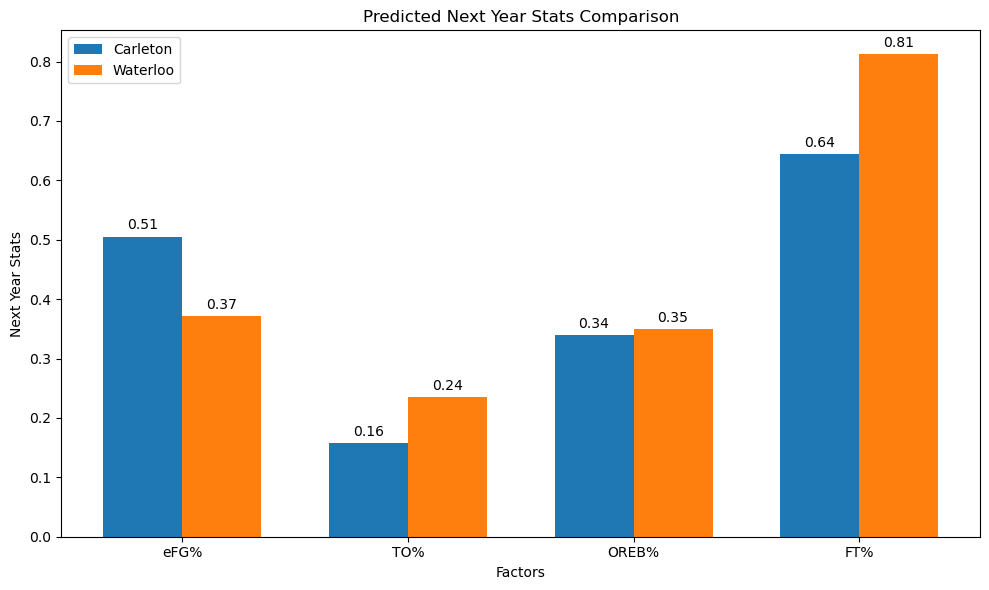

({'eFG%': 0.5054063954504546,
  'TO%': 0.157725477043038,
  'OREB%': 0.3391710363735412,
  'FT%': 0.6448834958241313},
 {'eFG%': 0.3714259469051408,
  'TO%': 0.2351734353532364,
  'OREB%': 0.3500630600311565,
  'FT%': 0.8120381497797218})

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Function to predict next year's stats using linear regression
def predict_next_year_stats(data, team):
    # Extract team-specific data
    team_data = data[data['Team'] == team]
    
    # Define the features (current year stats) and target (next year stats)
    X = np.arange(len(team_data)).reshape(-1, 1)  # Using game number as the feature for simplicity
    predictions = {}
    
    for factor in ['eFG%', 'TO%', 'OREB%', 'FT%']:
        y = team_data[factor].values
        model = LinearRegression().fit(X, y)
        next_year_stat = model.predict([[len(team_data) + 1]])[0]
        predictions[factor] = next_year_stat
    
    return predictions

# Predict next year's stats for Carleton and Waterloo
carleton_next_year_stats = predict_next_year_stats(data, 'Carleton')
waterloo_next_year_stats = predict_next_year_stats(data, 'Waterloo')

# Display the predictions
carleton_next_year_stats, waterloo_next_year_stats


# Plotting the predictions
factors = ['eFG%', 'TO%', 'OREB%', 'FT%']
teams = ['Carleton', 'Waterloo']
x = np.arange(len(factors))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

carleton_values = [carleton_next_year_stats[factor] for factor in factors]
waterloo_values = [waterloo_next_year_stats[factor] for factor in factors]

rects1 = ax.bar(x - width/2, carleton_values, width, label='Carleton')
rects2 = ax.bar(x + width/2, waterloo_values, width, label='Waterloo')

# Add labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Factors')
ax.set_ylabel('Next Year Stats')
ax.set_title('Predicted Next Year Stats Comparison')
ax.set_xticks(x)
ax.set_xticklabels(factors)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Display the predictions
carleton_next_year_stats, waterloo_next_year_stats